In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
import os 
os.listdir()

['.config', 'mnist_data', 'adc.json', 'mnist.zip', 'sample_data']

In [3]:
!pip install python-mnist

In [0]:
import warnings
warnings.filterwarnings('ignore')
from mnist import MNIST
import numpy as np


mndata = MNIST(r'mnist_data')
images_train, _ = mndata.load_training()


In [0]:
randomDim = 100

# Load MNIST data

images_train = (np.array(images_train).astype(np.float32) - 127.5)/127.5
images_train = images_train.reshape(60000, 784)

In [7]:
from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
from keras import initializers

Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt

In [0]:
adam = Adam(lr=0.0002, beta_1=0.5)

generator = Sequential()
generator.add(Dense(256, input_dim=randomDim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784, activation='tanh'))
generator.compile(loss='binary_crossentropy', optimizer=adam)

In [0]:
discriminator = Sequential()
discriminator.add(Dense(1024, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=adam)

In [0]:
discriminator.trainable = False
ganInput = Input(shape=(randomDim,))
x = generator(ganInput)
ganOutput = discriminator(x)
gan = Model(inputs=ganInput, outputs=ganOutput)
gan.compile(loss='binary_crossentropy', optimizer=adam)

In [0]:
def plotGeneratedImages(epoch, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, randomDim])
    generatedImages = generator.predict(noise)
    generatedImages = generatedImages.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generatedImages.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generatedImages[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image_epoch_%d.png' % epoch)

In [0]:
def train(epochs=1, batchSize=128):
    batchCount = int(images_train.shape[0] / batchSize)
    print ('Epochs:', epochs)
    print ('Batch size:', batchSize)
    print ('Batches per epoch:', batchCount)

    for e in range(1, epochs+1):
        print ('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in range(batchCount):
            # Get a random set of input noise and images
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            imageBatch = images_train[np.random.randint(0, images_train.shape[0], size=batchSize)]

            # Generate fake MNIST images
            generatedImages = generator.predict(noise)
            # print np.shape(imageBatch), np.shape(generatedImages)
            X = np.concatenate([imageBatch, generatedImages])

            # Labels for generated and real data
            yDis = np.zeros(2*batchSize)
            # One-sided label smoothing
            yDis[:batchSize] = 0.9

            # Train discriminator
            discriminator.trainable = True
            dloss = discriminator.train_on_batch(X, yDis)

            # Train generator
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            yGen = np.ones(batchSize)
            discriminator.trainable = False
            gloss = gan.train_on_batch(noise, yGen)

        

        if e == 1 or e % 20 == 0:
            plotGeneratedImages(e)
            


Epochs: 200
Batch size: 100
Batches per epoch: 600
--------------- Epoch 1 ---------------
--------------- Epoch 2 ---------------
--------------- Epoch 3 ---------------
--------------- Epoch 4 ---------------
--------------- Epoch 5 ---------------
--------------- Epoch 6 ---------------
--------------- Epoch 7 ---------------
--------------- Epoch 8 ---------------
--------------- Epoch 9 ---------------
--------------- Epoch 10 ---------------
--------------- Epoch 11 ---------------
--------------- Epoch 12 ---------------
--------------- Epoch 13 ---------------
--------------- Epoch 14 ---------------
--------------- Epoch 15 ---------------
--------------- Epoch 16 ---------------
--------------- Epoch 17 ---------------
--------------- Epoch 18 ---------------
--------------- Epoch 19 ---------------
--------------- Epoch 20 ---------------
--------------- Epoch 21 ---------------
--------------- Epoch 22 ---------------
--------------- Epoch 23 ---------------
---------------

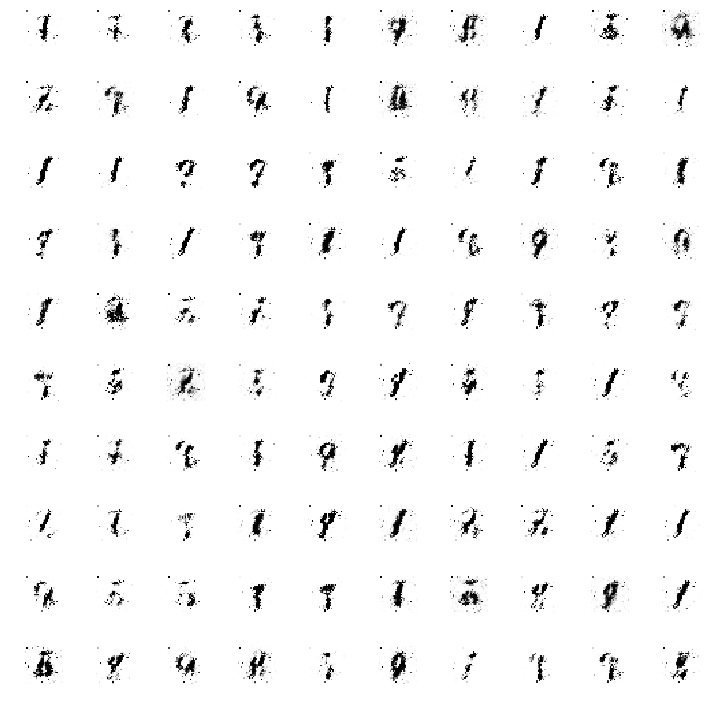

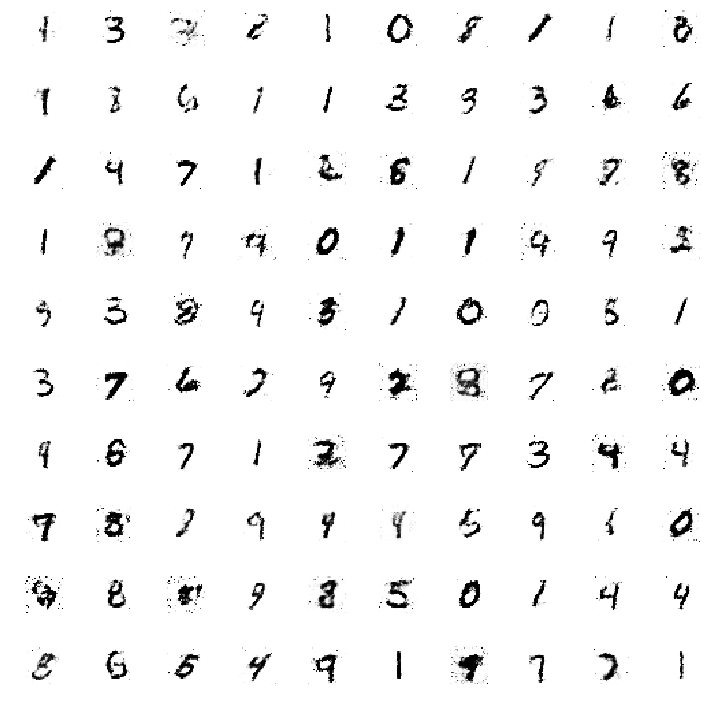

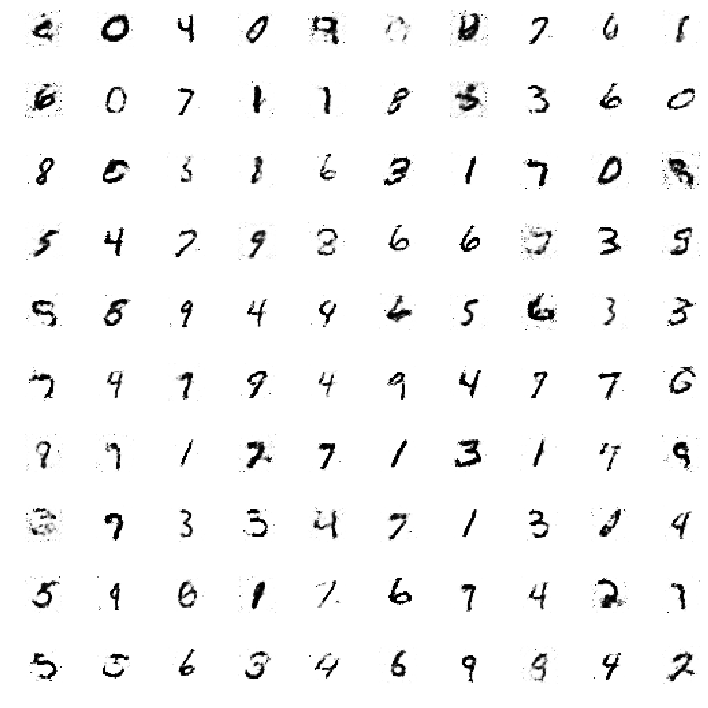

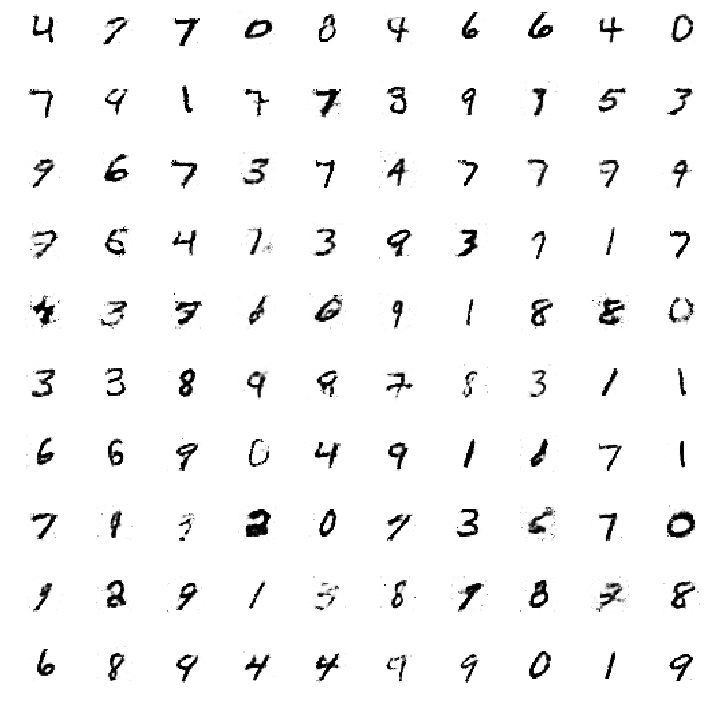

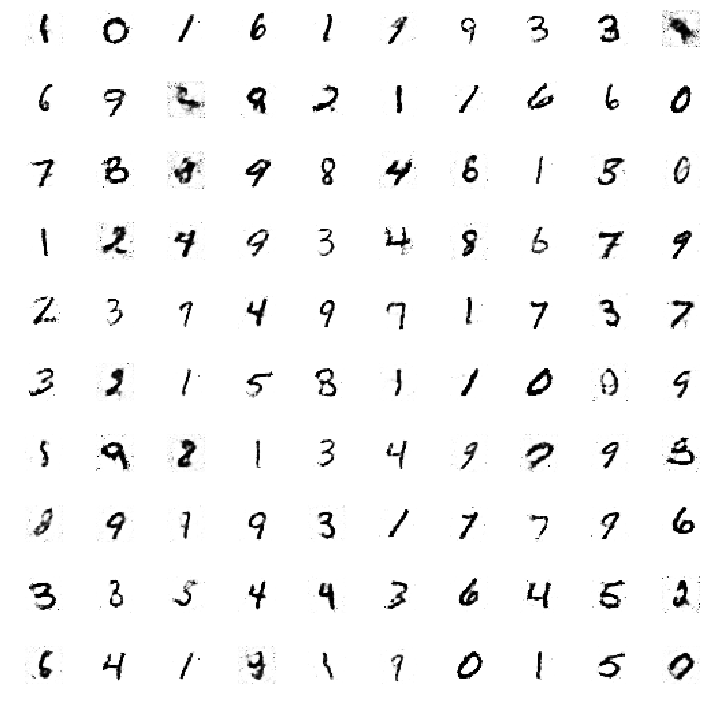

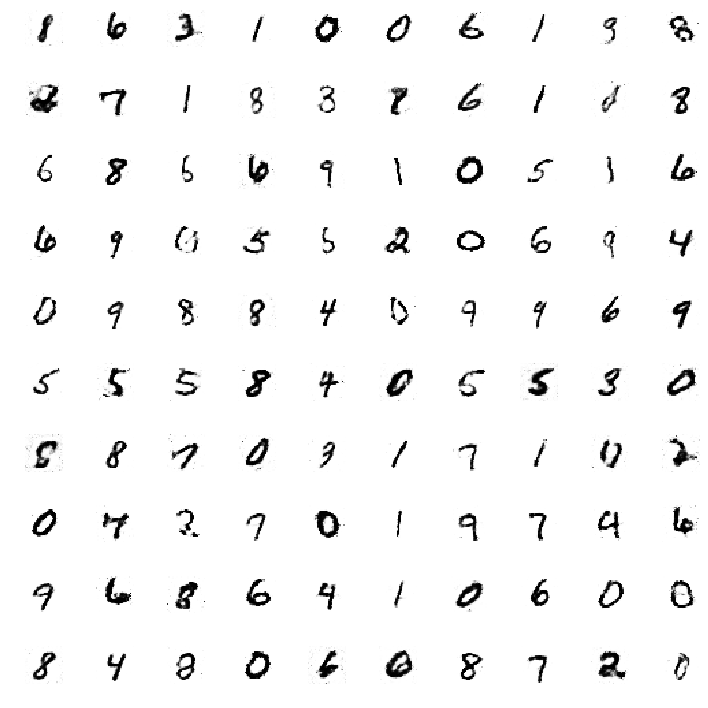

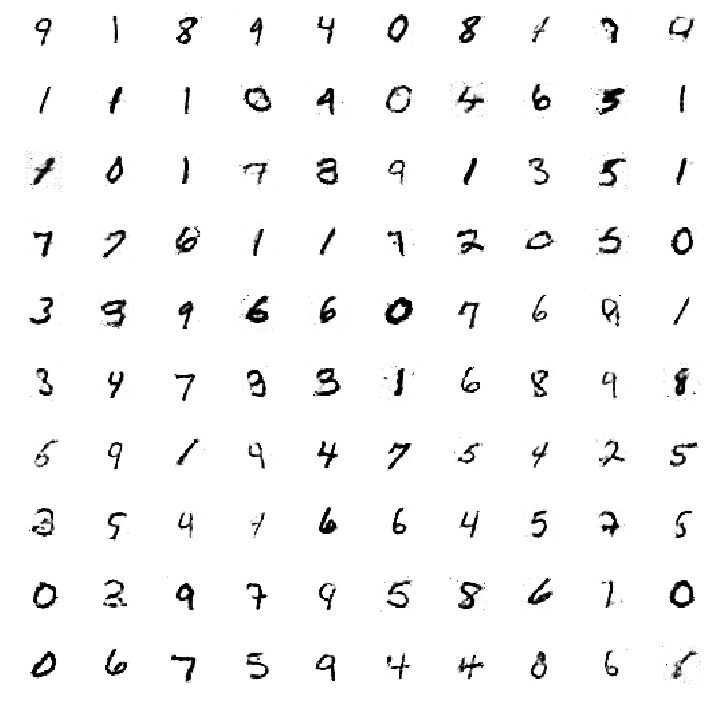

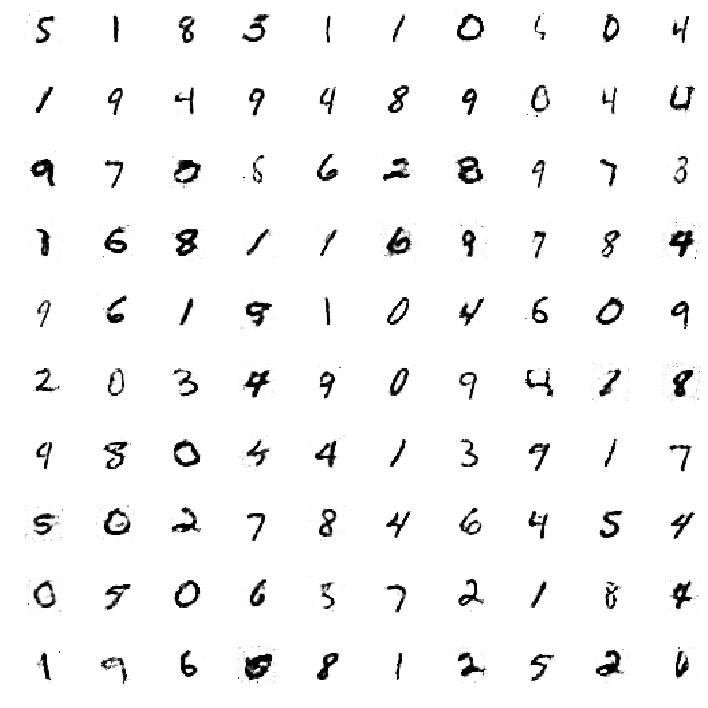

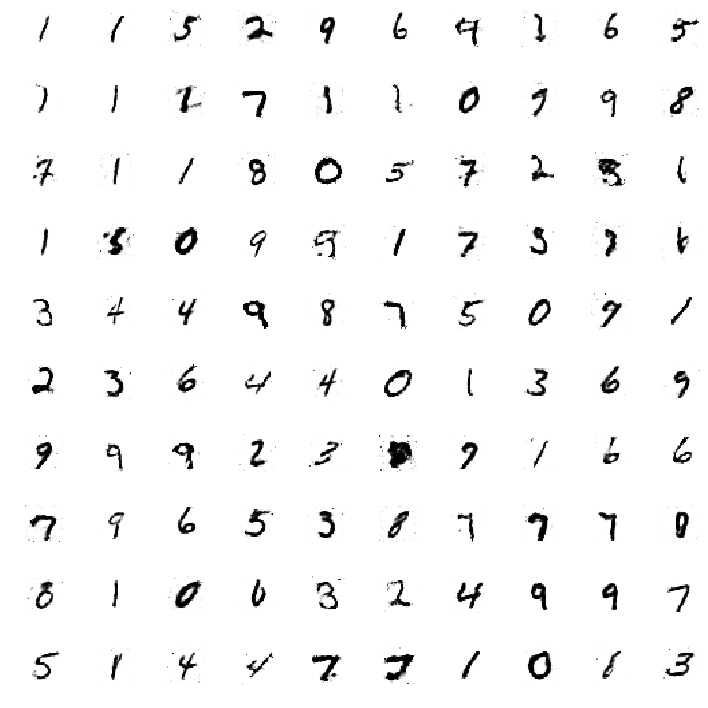

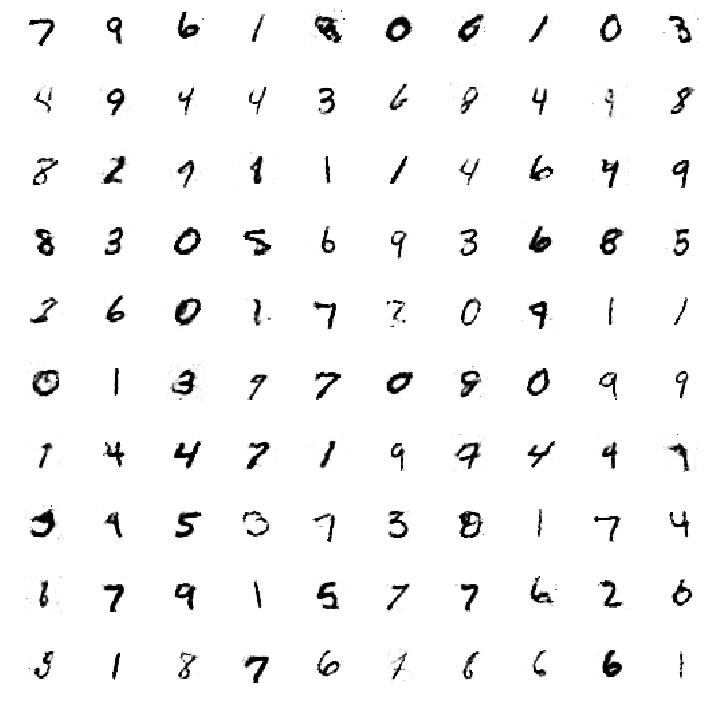

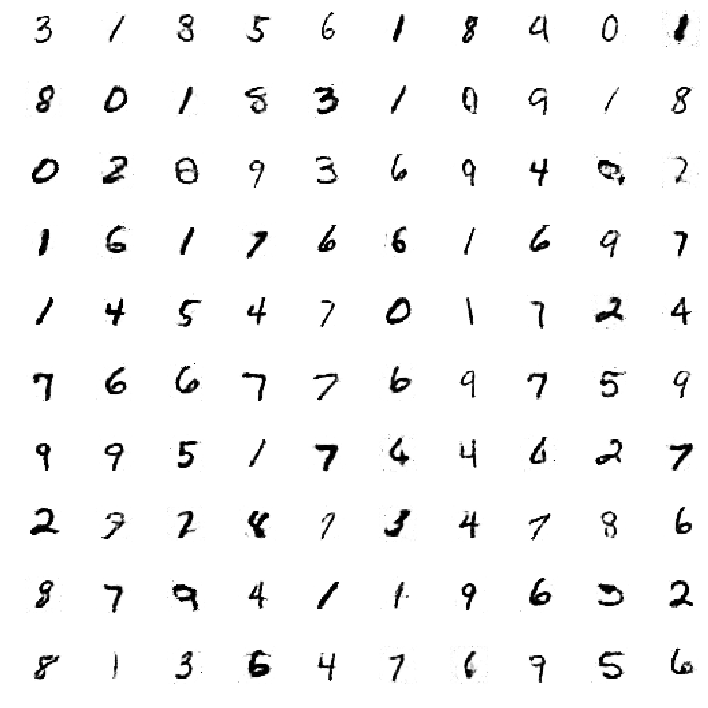

In [20]:
train(200,100)

In [21]:
os.listdir()

['.config',
 'gan_generated_image_epoch_180.png',
 'gan_generated_image_epoch_20.png',
 'gan_generated_image_epoch_160.png',
 'gan_generated_image_epoch_200.png',
 'mnist_data',
 'adc.json',
 'gan_generated_image_epoch_80.png',
 'gan_generated_image_epoch_40.png',
 'mnist.zip',
 'gan_generated_image_epoch_120.png',
 'gan_generated_image_epoch_100.png',
 'gan_generated_image_epoch_60.png',
 'gan_generated_image_epoch_140.png',
 'gan_generated_image_epoch_1.png',
 'sample_data']

In [0]:
from google.colab import files

In [0]:
for f in [
 'gan_generated_image_epoch_180.png',
 'gan_generated_image_epoch_20.png',
 'gan_generated_image_epoch_160.png',
 'gan_generated_image_epoch_200.png',
 
 'gan_generated_image_epoch_80.png',
 'gan_generated_image_epoch_40.png',
 
 'gan_generated_image_epoch_120.png',
 'gan_generated_image_epoch_100.png',
 'gan_generated_image_epoch_60.png',
 'gan_generated_image_epoch_140.png',
 'gan_generated_image_epoch_1.png'
 ]:
  files.download(f)